The experiment is done with a random split so we should not detect a data drift

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool

from cinnamon.drift import ModelDriftExplainer

# Breast Cancer Data

In [2]:
dataset = datasets.load_breast_cancer()

In [3]:
X = pd.DataFrame(dataset.data, columns = dataset.feature_names)
y = dataset.target

In [4]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Build CatBoost model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [6]:
clf = CatBoostClassifier(loss_function='Logloss',
                         learning_rate=0.1,
                         iterations=1000,
                         max_depth=6,
                         early_stopping_rounds=20,
                         random_seed=2021,
                         verbose=False
                        )

In [7]:
clf.fit(X=Pool(X_train, y_train), eval_set=Pool(X_test, y_test))

In [8]:
drift_explainer = ModelDriftExplainer(clf)
drift_explainer.fit(X1=X_train, X2=X_test, y1=y_train, y2=y_test)

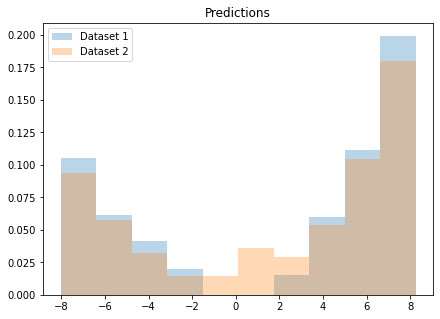

In [9]:
drift_explainer.plot_prediction_drift()

In [10]:
drift_explainer.get_prediction_drift()

[DriftMetricsNum(mean_difference=0.04634869138730369, wasserstein=0.5538123284880192, ks_test=BaseStatisticalTestResult(statistic=0.0658702871080549, pvalue=0.6459307033330983))]

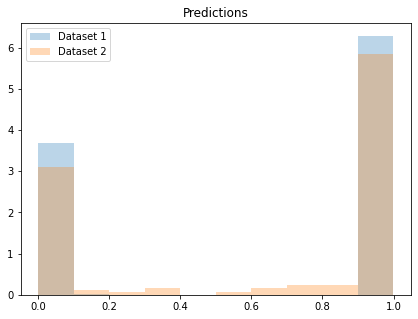

[DriftMetricsNum(mean_difference=0.016349784083660057, wasserstein=0.0339516727427027, ks_test=BaseStatisticalTestResult(statistic=0.0658702871080549, pvalue=0.6459307033330983))]

In [11]:
drift_explainer.plot_prediction_drift(prediction_type='proba')
drift_explainer.get_prediction_drift(prediction_type='proba')

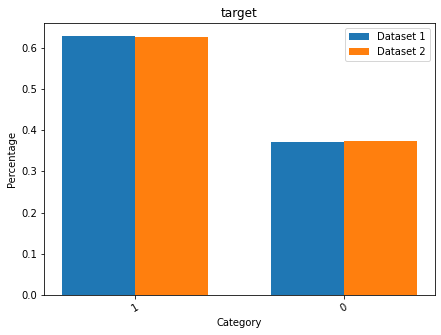

DriftMetricsCat(wasserstein=0.0024097093655411628, jensen_shannon=0.0017616379091961293, chi2_test=Chi2TestResult(statistic=0.0, pvalue=1.0, dof=1, contingency_table=        0      1
X1  148.0  250.0
X2   64.0  107.0))

In [12]:
drift_explainer.plot_target_drift()
drift_explainer.get_target_drift()

In [13]:
drift_explainer.get_performance_metrics_drift()

PerformanceMetricsDrift(dataset1=ClassificationMetrics(accuracy=1.0, log_loss=0.00748801449692523), dataset2=ClassificationMetrics(accuracy=0.9590643274853801, log_loss=0.10225262245942275))

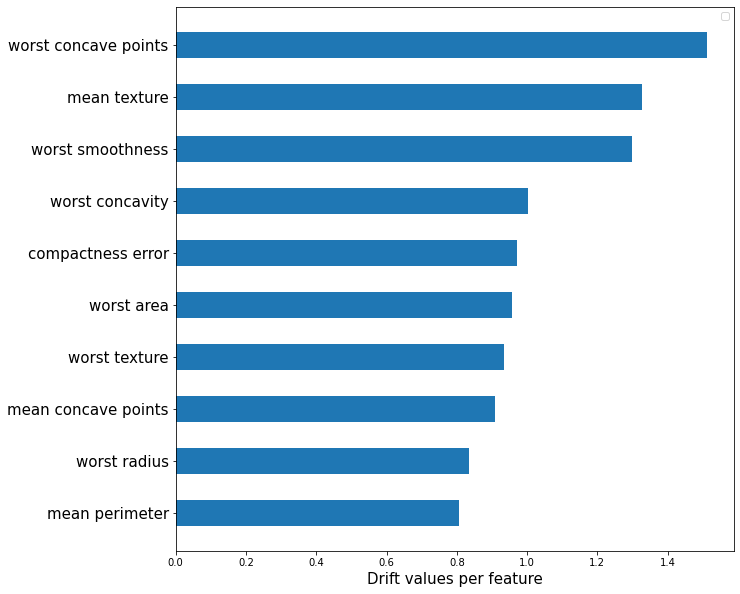

In [14]:
drift_explainer.plot_tree_based_drift_values(type='node_size')

In [15]:
drift_explainer.get_tree_based_drift_values(type='node_size')

array([[0.32509379],
       [1.32677547],
       [0.80774132],
       [0.66001433],
       [0.32493723],
       [0.45099504],
       [0.61364896],
       [0.90952567],
       [0.34701315],
       [0.44619327],
       [0.50151929],
       [0.76307014],
       [0.47727041],
       [0.49002657],
       [0.51454348],
       [0.97118271],
       [0.41764427],
       [0.49172829],
       [0.36100245],
       [0.41368567],
       [0.83342952],
       [0.93508863],
       [0.80483778],
       [0.95622554],
       [1.29879061],
       [0.41801119],
       [1.00313047],
       [1.51256486],
       [0.74948057],
       [0.48788657]])

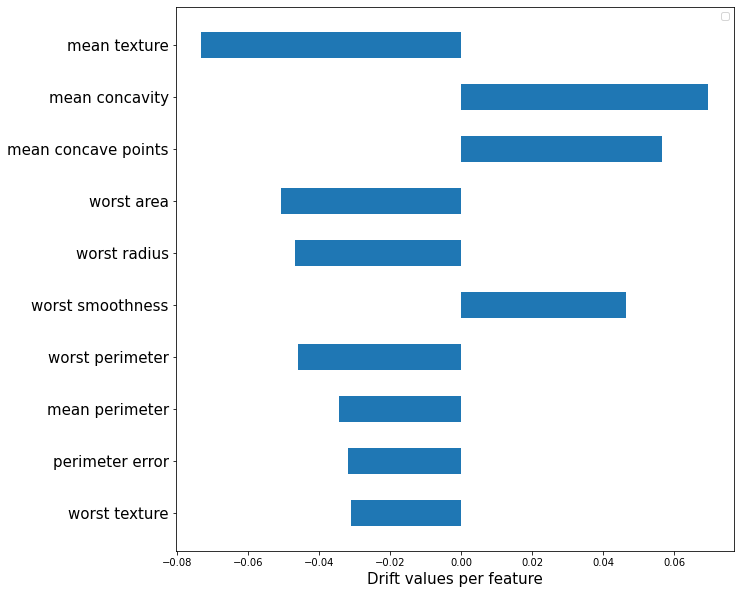

In [16]:
drift_explainer.plot_tree_based_drift_values(type='mean_norm')

In [17]:
drift_explainer.get_tree_based_drift_values(type='mean_norm')

array([[-0.00105982],
       [-0.07325502],
       [-0.03451459],
       [-0.02184468],
       [ 0.00142696],
       [ 0.00066276],
       [ 0.06964488],
       [ 0.05645905],
       [-0.00341184],
       [-0.00472395],
       [-0.02023157],
       [-0.01013813],
       [-0.03178182],
       [-0.00809401],
       [-0.01765605],
       [-0.01061387],
       [ 0.00070906],
       [ 0.01189473],
       [ 0.00576327],
       [-0.01932325],
       [-0.04673837],
       [-0.03106766],
       [-0.04590803],
       [-0.05081389],
       [ 0.04648351],
       [-0.00369685],
       [ 0.02293893],
       [ 0.01151517],
       [-0.0271206 ],
       [-0.00963751]])

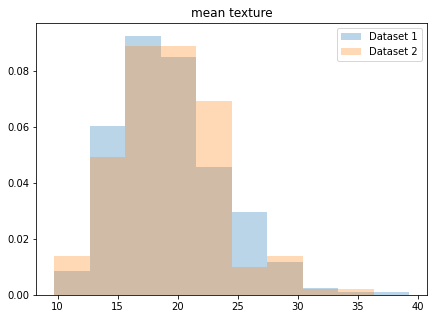

DriftMetricsNum(mean_difference=0.014966205295483093, wasserstein=0.48581195450938897, ks_test=BaseStatisticalTestResult(statistic=0.07262922801140204, pvalue=0.5235102002710169))

In [18]:
drift_explainer.plot_feature_drift('mean texture')
drift_explainer.get_feature_drift('mean texture')

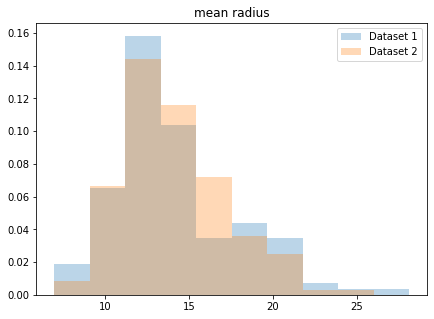

In [19]:
drift_explainer.plot_feature_drift(0)

In [20]:
drift_explainer.get_feature_drifts()

[DriftMetricsNum(mean_difference=-0.06832955714243738, wasserstein=0.5165887184460309, ks_test=BaseStatisticalTestResult(statistic=0.07067501248934732, pvalue=0.558530379618637)),
 DriftMetricsNum(mean_difference=0.014966205295483093, wasserstein=0.48581195450938897, ks_test=BaseStatisticalTestResult(statistic=0.07262922801140204, pvalue=0.5235102002710169)),
 DriftMetricsNum(mean_difference=-0.5394598724617197, wasserstein=3.3009656469481903, ks_test=BaseStatisticalTestResult(statistic=0.07401040289165124, pvalue=0.4998149146505402)),
 DriftMetricsNum(mean_difference=-17.377639660289788, wasserstein=51.29123100884536, ks_test=BaseStatisticalTestResult(statistic=0.06404831173410915, pvalue=0.6798041178199971)),
 DriftMetricsNum(mean_difference=-0.0011612596608774894, wasserstein=0.0016581176349584157, ks_test=BaseStatisticalTestResult(statistic=0.10195715419201269, pvalue=0.15288885704183494)),
 DriftMetricsNum(mean_difference=-0.003067542684181135, wasserstein=0.006741856651679452, ks